In [40]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stat
import requests as req

#Classify and predict the location of the user to receive a good signal strength.
#Building 2 different model and comparing them

#The RSSI dataset has 13 beacon readings which tells the strength of the signal, RSSI readings are represented in negative, 
#if it is –50 it represents the user is close to the ibeacon and hence the strength of signal is much strong than the value –95
#which represents the user isn't in the close proximity of the beacon and hence the strength of the signal is weak. 
#BLE RSSI labeled dataset is used to train different classifiers and analyze the performance.

#reading dataset from github after making repository
URL = "https://raw.githubusercontent.com/AftabAhmedAbro/Data-Analysis-BLE-RSSI-Indoor-Localization-and-Navigation/main/iBeacon_RSSI_Labeled.csv"
dataset = pd.read_csv(URL)
print(dataset)



Image_URL ="https://github.com/AftabAhmedAbro/Data-Analysis-BLE-RSSI-Indoor-Localization-and-Navigation/blob/main/iBeacon_Layout.jpg"

     location                 date  b3001  b3002  b3003  b3004  b3005  b3006  \
0         O02  10-18-2016 11:15:21   -200   -200   -200   -200   -200    -78   
1         P01  10-18-2016 11:15:19   -200   -200   -200   -200   -200    -78   
2         P01  10-18-2016 11:15:17   -200   -200   -200   -200   -200    -77   
3         P01  10-18-2016 11:15:15   -200   -200   -200   -200   -200    -77   
4         P01  10-18-2016 11:15:13   -200   -200   -200   -200   -200    -77   
...       ...                  ...    ...    ...    ...    ...    ...    ...   
1415      I01    4-19-2016 9:37:46   -200    -76   -200   -200   -200   -200   
1416      I01    4-19-2016 9:37:39   -200    -72   -200   -200   -200   -200   
1417      I01    4-19-2016 9:37:36   -200    -67   -200   -200   -200   -200   
1418      I01    4-19-2016 9:37:26   -200    -79   -200   -200   -200   -200   
1419      I01    4-19-2016 9:37:23   -200    -75   -200   -200   -200   -200   

      b3007  b3008  b3009  b3010  b3011

# the diagram showing the places using iBeacon where the Signal Strength is optimized

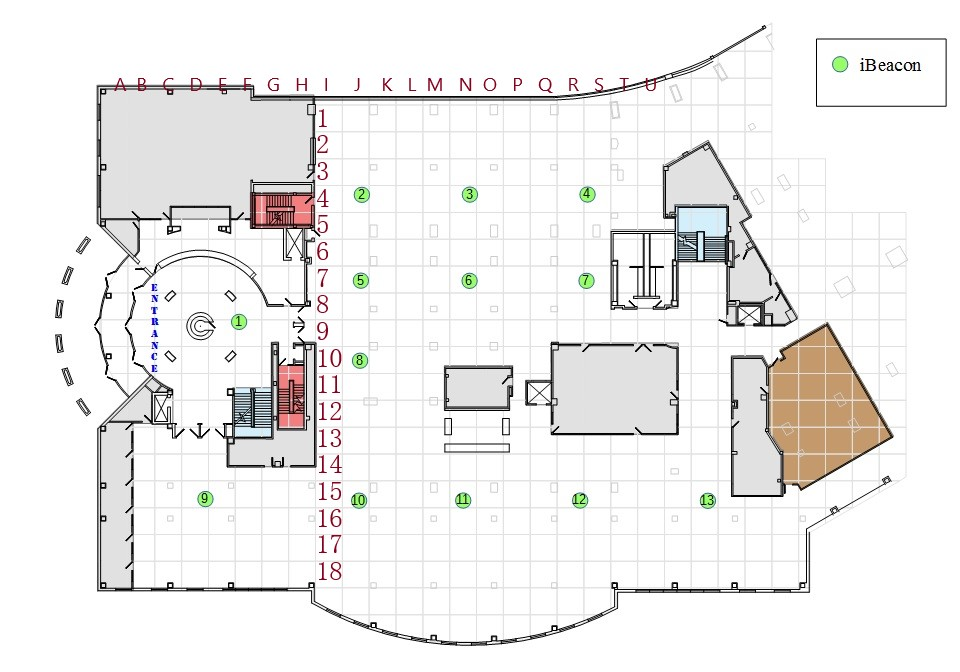

In [10]:
#checking data types of all columns
dataset.dtypes

location    object
date        object
b3001        int64
b3002        int64
b3003        int64
b3004        int64
b3005        int64
b3006        int64
b3007        int64
b3008        int64
b3009        int64
b3010        int64
b3011        int64
b3012        int64
b3013        int64
dtype: object

In [9]:
#Describing the dataset
dataset.describe()


,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,-197.825352,-156.623944,-175.533099,-164.534507,-178.378169,-175.063380,-195.637324,-191.970423,-197.145070,-197.442254,-197.748592,-197.233803,-196.065493
std,16.259105,60.217747,49.452958,56.523261,47.175799,49.596627,22.880980,30.733742,19.160207,17.741632,16.852535,18.541088,22.053924
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
50%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
75%,-200.000000,-78.000000,-200.000000,-80.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
max,-67.000000,-59.000000,-56.000000,-56.000000,-60.000000,-62.000000,-58.000000,-56.000000,-55.000000,-61.000000,-59.000000,-60.000000,-59.000000


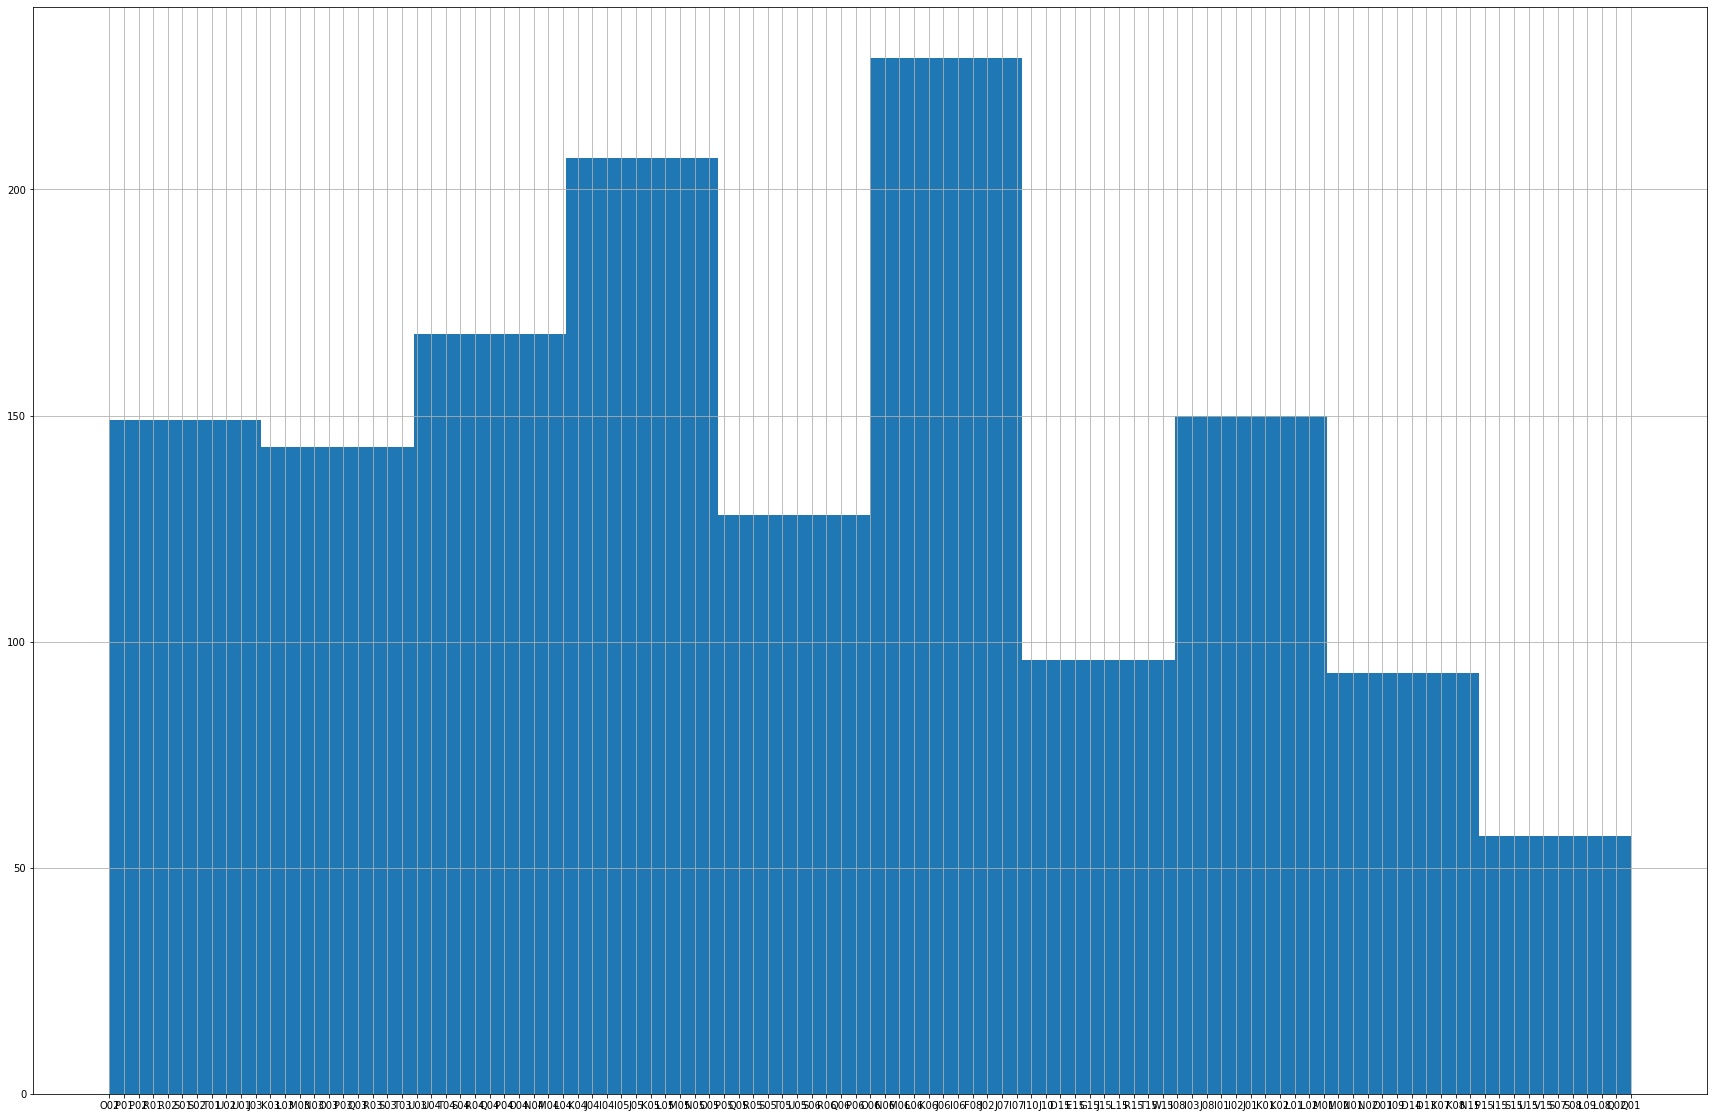

In [12]:
#Visualizing overall dataset using histogram
loc=dataset.iloc[:,0]
loc.hist(figsize=(30,20))

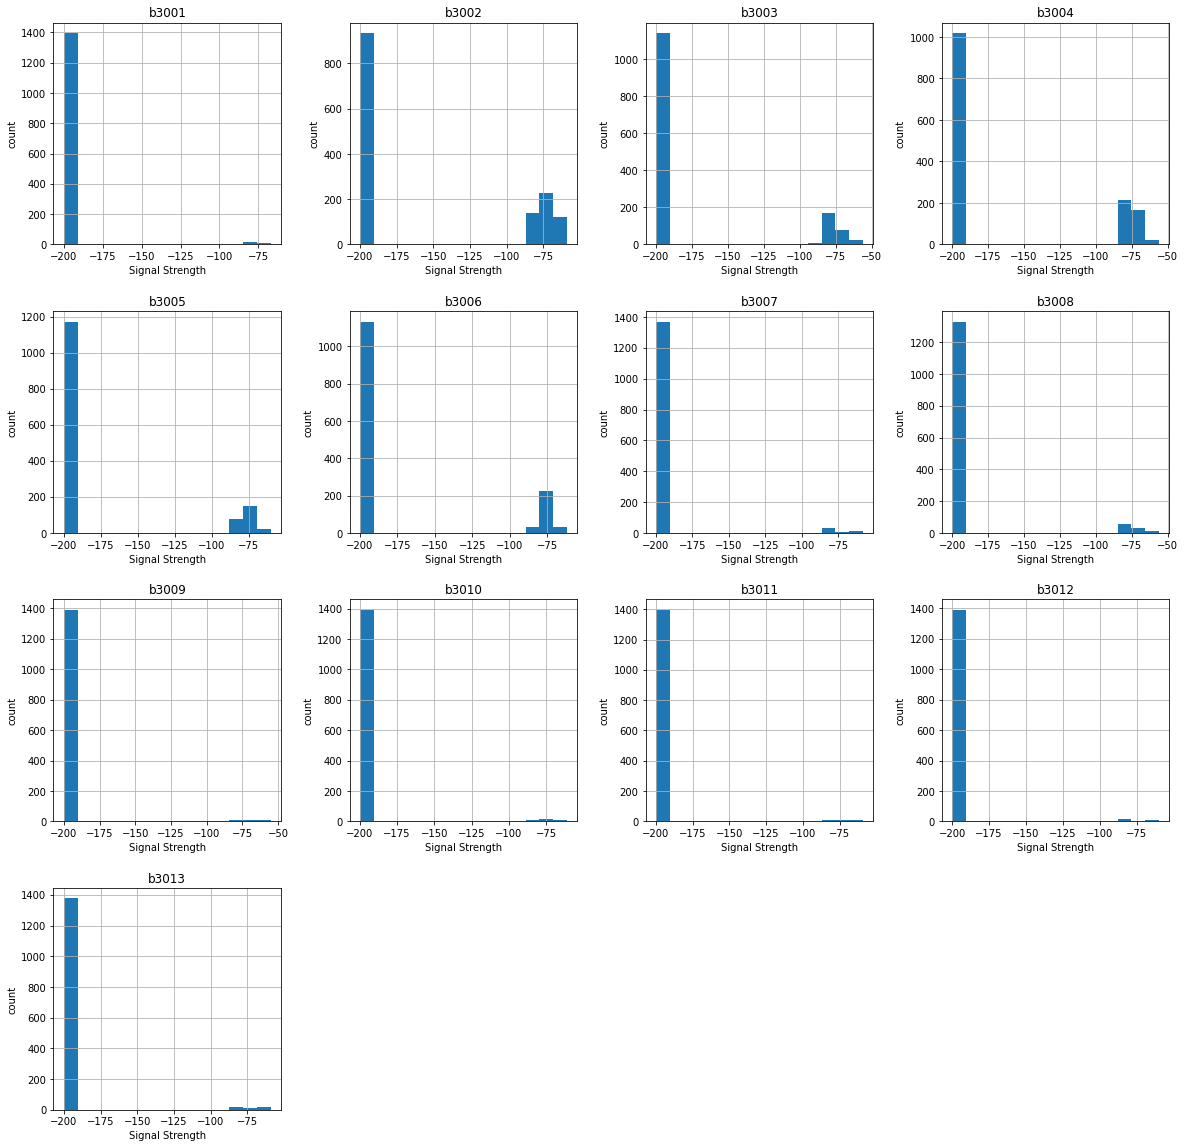

In [3]:
#Visualising the data usng histogram
plots = dataset.hist(bins=15, figsize=(20,20))

for ax in plots.flatten():
    ax.set_xlabel("Signal Strength")
    ax.set_ylabel("count")

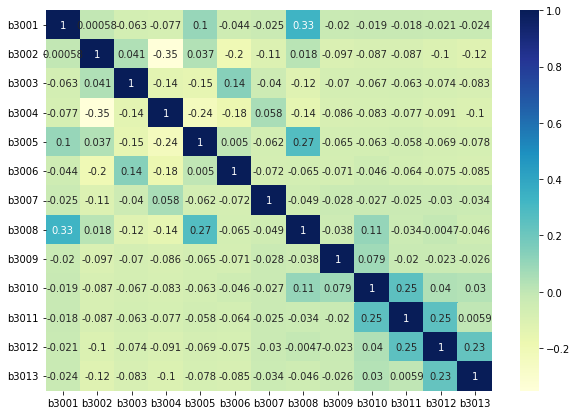

In [6]:
#visualization of the correlation of features

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(dataset.corr(method='kendall'), ax=ax,cmap="YlGnBu", annot=True)

Text(0, 0.5, 'Correlation coefficient')

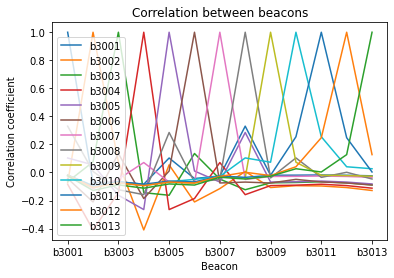

In [33]:
#plotting correlation coefficients vs ibeacons
dt = dataset.corr()
fig=dt.plot()
fig.set_title('Correlation between beacons')
fig.set_xlabel('Beacon')
fig.set_ylabel('Correlation coefficient')

Text(0, 0.5, 'frequency')

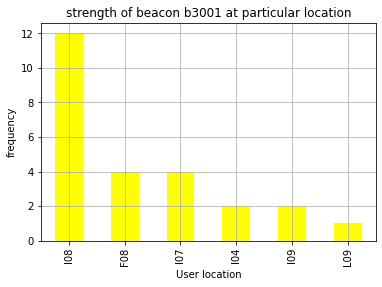

In [27]:
# creating a mask for ibeacon3001 values above -90 and ploting a bar graph against the locations of users

mask1=dataset['b3001']>-90
a=dataset.loc[mask1,'location'].value_counts()
a1=a.plot(kind='bar',color='yellow')
a1.grid()
a1.set_title('strength of beacon b3001 at particular location')
a1.set_xlabel('User location')
a1.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

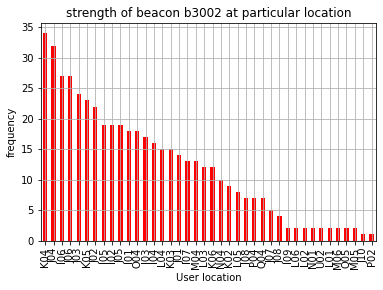

In [23]:
# creating a mask for ibeacon3002 values above -90 and ploting a bar graph against the locations of users

mask2=dataset['b3002']>-90
a=dataset.loc[mask2,'location'].value_counts()
a1=a.plot(kind='bar',color='red')
a1.grid()
a1.set_title('strength of beacon b3002 at particular location')
a1.set_xlabel('User location')
a1.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

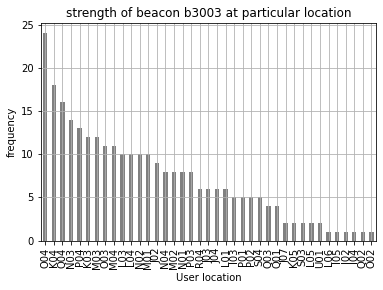

In [28]:
# creating a mask for ibeacon3003 values above -90 and ploting a bar graph against the locations of users

mask3=dataset['b3003']>-90
a=dataset.loc[mask3,'location'].value_counts()
a1=a.plot(kind='bar',color='grey')
a1.grid()
a1.set_title('strength of beacon b3003 at particular location')
a1.set_xlabel('User location')
a1.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

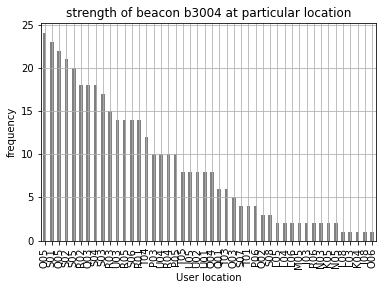

In [29]:
# creating a mask for ibeacon3004 values above -90 and ploting a bar graph against the locations of users

mask4=dataset['b3004']>-90
a=dataset.loc[mask4,'location'].value_counts()
a1=a.plot(kind='bar',color='grey')
a1.grid()
a1.set_title('strength of beacon b3004 at particular location')
a1.set_xlabel('User location')
a1.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

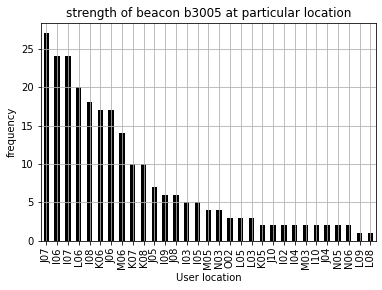

In [30]:
# creating a mask for ibeacon3005 values above -90 and ploting a bar graph against the locations of users

mask5=dataset['b3005']>-90
a=dataset.loc[mask5,'location'].value_counts()
a1=a.plot(kind='bar',color='black')
a1.grid()
a1.set_title('strength of beacon b3005 at particular location')
a1.set_xlabel('User location')
a1.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

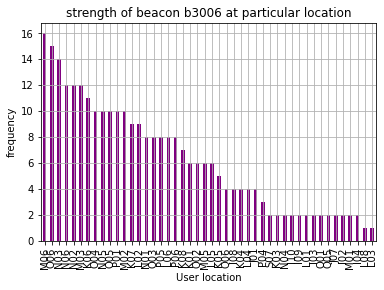

In [42]:
# creating a mask for ibeacon3006 values above -90 and ploting a bar graph against the locations of users

mask6=dataset['b3006']>-90
a=dataset.loc[mask6,'location'].value_counts()
a1=a.plot(kind='bar',color='purple')
a1.grid()
a1.set_title('strength of beacon b3006 at particular location')
a1.set_xlabel('User location')
a1.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

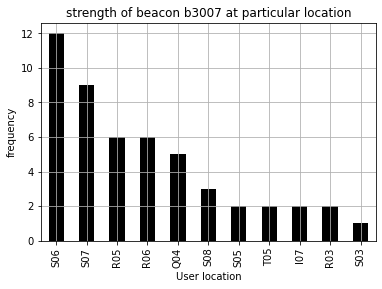

In [43]:
# creating a mask for ibeacon3007 values above -90 and ploting a bar graph against the locations of users

mask7=dataset['b3007']>-90
a=dataset.loc[mask7,'location'].value_counts()
a1=a.plot(kind='bar',color='black')
a1.grid()
a1.set_title('strength of beacon b3007 at particular location')
a1.set_xlabel('User location')
a1.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

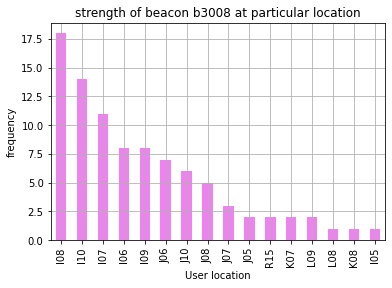

In [44]:
# creating a mask for ibeacon3008 values above -90 and ploting a bar graph against the locations of users

mask8=dataset['b3008']>-90
a=dataset.loc[mask8,'location'].value_counts()
a1=a.plot(kind='bar',color='violet')
a1.grid()
a1.set_title('strength of beacon b3008 at particular location')
a1.set_xlabel('User location')
a1.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

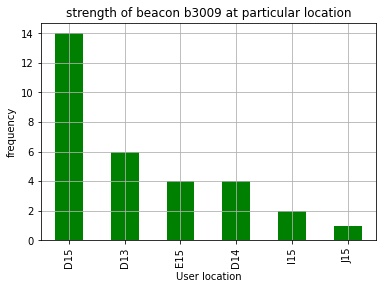

In [46]:
# creating a mask for ibeacon3009 values above -90 and ploting a bar graph against the locations of users

mask9=dataset['b3009']>-90
a=dataset.loc[mask9,'location'].value_counts()
a1=a.plot(kind='bar',color='Green')
a1.grid()
a1.set_title('strength of beacon b3009 at particular location')
a1.set_xlabel('User location')
a1.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

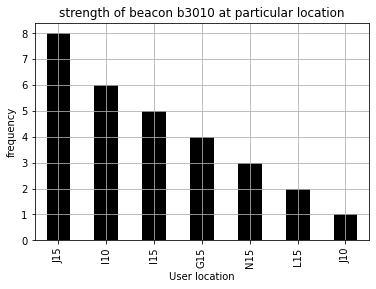

In [48]:
# creating a mask for ibeacon3010 values above -90 and ploting a bar graph against the locations of users

mask10=dataset['b3010']>-90
a=dataset.loc[mask10,'location'].value_counts()
a1=a.plot(kind='bar',color='black')
a1.grid()
a1.set_title('strength of beacon b3010 at particular location')
a1.set_xlabel('User location')
a1.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

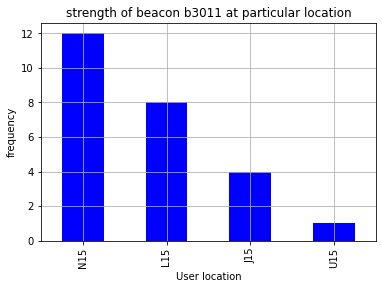

In [49]:
# creating a mask for ibeacon3011 values above -90 and ploting a bar graph against the locations of users

mask11=dataset['b3011']>-90
a=dataset.loc[mask11,'location'].value_counts()
a1=a.plot(kind='bar',color='blue')
a1.grid()
a1.set_title('strength of beacon b3011 at particular location')
a1.set_xlabel('User location')
a1.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

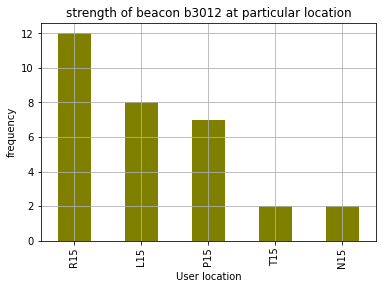

In [50]:
# creating a mask for ibeacon3012 values above -90 and ploting a bar graph against the locations of users

mask12=dataset['b3012']>-90
a=dataset.loc[mask12,'location'].value_counts()
a1=a.plot(kind='bar',color='olive')
a1.grid()
a1.set_title('strength of beacon b3012 at particular location')
a1.set_xlabel('User location')
a1.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

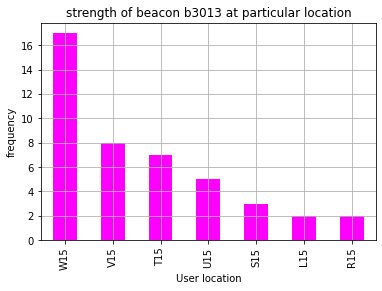

In [51]:
# creating a mask for ibeacon3013 values above -90 and ploting a bar graph against the locations of users

mask13=dataset['b3013']>-90
a=dataset.loc[mask13,'location'].value_counts()
a1=a.plot(kind='bar',color='magenta')
a1.grid()
a1.set_title('strength of beacon b3013 at particular location')
a1.set_xlabel('User location')
a1.set_ylabel('frequency')